<a href="https://colab.research.google.com/github/MuhammadAinurRiziq13/PCVK_2024_19/blob/main/Week9_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Nama  : Muhammad Ainur Riziq**
*   **Absen : 19**
*   **Kelas : TI - 3E**

https://github.com/MuhammadAinurRiziq13/PCVK_2024_19

In [14]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Import Library



In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV

In [35]:
# Fungsi dilasi tanpa library
def dilasi_citra_cross(F, w):
    # Ukuran gambar input
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Elemen struktur (SED) berbentuk cross untuk dilasi
    SED = np.zeros((w, w), dtype=np.uint8)
    constant1 = (w - 1) // 2
    for i in range(w):
        SED[constant1, i] = 1  # Garis horizontal
        SED[i, constant1] = 1  # Garis vertikal

    # Proses dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Fungsi dilasi tanpa library
def dilasi_citra_square(F, w):
    # Ukuran gambar input
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Elemen struktur (SED) matriks kotak penuh untuk dilasi
    SED = np.ones((w, w), dtype=np.uint8)
    constant1 = (w - 1) // 2

    # Proses dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

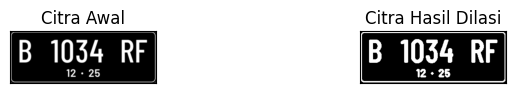

In [36]:
plat = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)
ret, thresh = cv2.threshold(plat, 125, 200, cv2.THRESH_BINARY)

w = 5
imgD = dilasi_citra_cross(thresh, w)

# Tampilkan hasil
plt.subplot(131), plt.imshow(plat, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

Kernel:
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


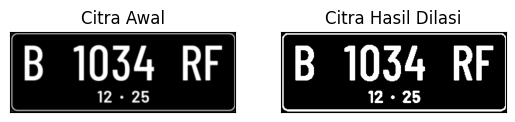

In [37]:
# Melakukan thresholding untuk membuat gambar biner
ret, thresh = cv2.threshold(plat, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan kernel dilasi 3x3 berbentuk salib
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
print("Kernel:\n", kernel)

# Melakukan dilasi pada gambar biner
dilasi = cv2.dilate(thresh, kernel, iterations=1)

# Menampilkan gambar asli dan hasil dilasi
plt.subplot(121), plt.imshow(plat, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(dilasi, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])

plt.show()

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV,

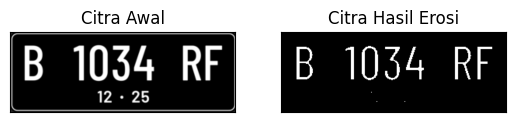

In [27]:
# Fungsi Erosi tanpa library
def erosi_citra(F, k):
    # Ukuran gambar
    m, n = F.shape
    # Elemen struktur (SE) untuk erosi
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Membaca gambar
img_e = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)

# Melakukan thresholding untuk membuat gambar biner
ret1, thresh1 = cv2.threshold(img_e, 175, 255, cv2.THRESH_BINARY)

# Ukuran elemen struktur
k = 5
imgE = erosi_citra(thresh1, k)

# Menampilkan gambar asli dan hasil erosi
plt.subplot(121), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

 Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV

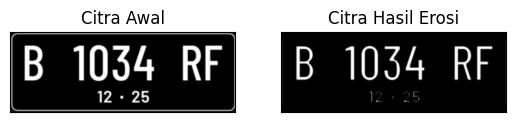

In [28]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)

# Mendefinisikan kernel untuk erosi
kernel = np.ones((5, 5), np.uint8)

# Melakukan erosi pada gambar
erosion = cv2.erode(img, kernel, iterations=1)

# Menampilkan gambar asli dan hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, s

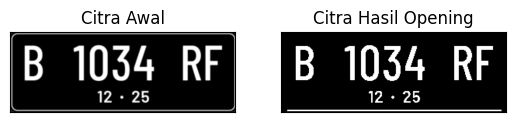

In [41]:
# Membaca gambar
img_o = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)

# Melakukan thresholding
ret, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)

# Ukuran elemen struktur
k = 3

# Melakukan operasi opening (erosi diikuti dilasi)
imgO = dilasi_citra_square(erosi_citra(thresho, k), k)

# Menampilkan gambar asli dan hasil opening
plt.subplot(121), plt.imshow(img_o, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

Operasi Opening Menggunakan Library Morphology

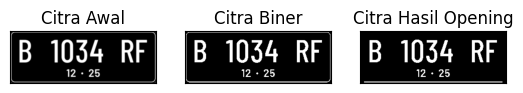

In [39]:
# Membaca gambar dalam mode grayscale
imglo = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)

# Melakukan thresholding untuk mendapatkan citra biner
ret, thresh = cv2.threshold(imglo, 127, 225, cv2.THRESH_BINARY)

# Mendefinisikan kernel untuk operasi opening
kernel = np.ones((3, 3), np.uint8)

# Melakukan operasi opening
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Menampilkan gambar awal, citra biner, dan citra hasil opening
plt.subplot(131), plt.imshow(imglo, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(openn, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

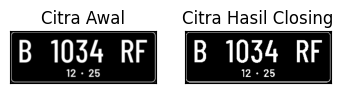

In [42]:
# Membaca gambar dalam mode grayscale
img_c = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)

# Melakukan thresholding untuk mendapatkan citra biner
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)

# Ukuran kernel
k = 3

# Melakukan operasi closing
imgC = erosi_citra(dilasi_citra_square(threshc, k), k)

# Menampilkan gambar awal dan hasil closing
plt.subplot(131), plt.imshow(img_c, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgC, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

operasi closing dengan library morphology

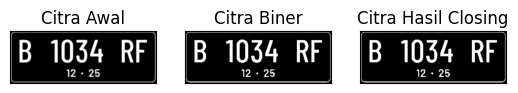

In [34]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)

# Melakukan thresholding untuk mendapatkan citra biner
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

# Mendefinisikan kernel untuk operasi morfologi
kernel = np.ones((3, 3), np.uint8)

# Melakukan operasi closing
closs = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Menampilkan gambar awal, citra biner, dan citra hasil closing
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(closs, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5

SED = Cross 3
SED = Cross 5


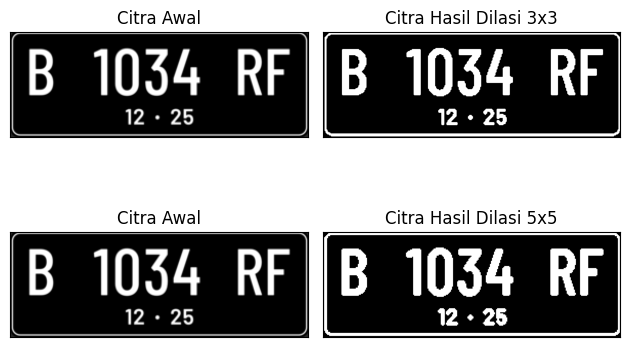

In [46]:
def dilasi_citra(F, w):
    # Ukuran gambar
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate structure element dilasi (SED)
    if w == 3:
        SED = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)
    elif w == 5:
        SED = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [1, 1, 1, 1, 1],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]], dtype=np.uint8)

    constant1 = (w - 1) // 2

    # Proses dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Membaca citra dan melakukan thresholding
img_d = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 255, cv2.THRESH_BINARY)

# Dilasi dengan SED Cross 3x3
print('SED = Cross 3')
w = 3
imgD_3x3 = dilasi_citra(thresh, w)

# Dilasi dengan SED Cross 5x5
print('SED = Cross 5')
w = 5
imgD_5x5 = dilasi_citra(thresh, w)

# Baris pertama: Citra asli dan Hasil Dilasi 3x3
plt.subplot(2, 2, 1), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(imgD_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi 3x3'), plt.xticks([]), plt.yticks([])

# Baris kedua: Citra asli dan Hasil Dilasi 5x5
plt.subplot(2, 2, 3), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(imgD_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi 5x5'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

 Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5

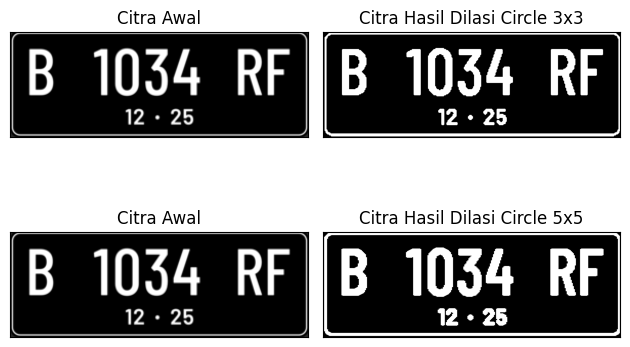

In [48]:
# Fungsi untuk dilasi citra dengan SED berbentuk lingkaran
def dilasi_citra(F, w):
    # Ukuran gambar
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate structure element dilasi (SED) menggunakan lingkaran
    SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
    constant1 = (w - 1) // 2

    # Proses dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Membaca citra dan melakukan thresholding
img_d = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 255, cv2.THRESH_BINARY)

# Dilasi dengan SED Circle 3x3
w = 3
imgD_3x3 = dilasi_citra(thresh, w)
plt.subplot(2, 2, 1), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(imgD_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi Circle 3x3'), plt.xticks([]), plt.yticks([])

# Dilasi dengan SED Circle 5x5
w = 5
imgD_5x5 = dilasi_citra(thresh, w)
plt.subplot(2, 2, 3), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(imgD_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi Circle 5x5'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7,

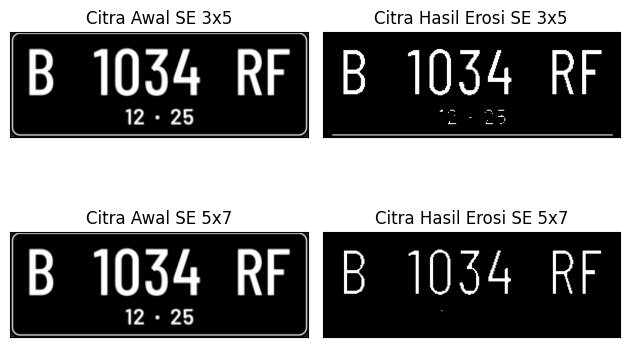

In [50]:
# Fungsi untuk erosi citra dengan SE berbentuk persegi panjang
def erosi_citra(F, p, l):
    # Ukuran gambar
    m, n = F.shape
    # Generate structure element erosi (SE)
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))  # SE persegi panjang
    constant1 = (l - 1) // 2
    constant2 = (p - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant1, m - constant1):
        for j in range(constant2, n - constant2):
            temp = F[i - constant1:i + constant1 + 1, j - constant2:j + constant2 + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Membaca citra dan melakukan thresholding
img_e = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 255, cv2.THRESH_BINARY)

# Erosi dengan SE Rectangle 3x5
p1, l1 = 5, 3
imgE_3x5 = erosi_citra(thresh1, p1, l1)
plt.subplot(2, 2, 1), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal SE 3x5'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(imgE_3x5, cmap='gray')
plt.title('Citra Hasil Erosi SE 3x5'), plt.xticks([]), plt.yticks([])

# Erosi dengan SE Rectangle 5x7
p2, l2 = 7, 5
imgE_5x7 = erosi_citra(thresh1, p2, l2)
plt.subplot(2, 2, 3), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal SE 5x7'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(imgE_5x7, cmap='gray')
plt.title('Citra Hasil Erosi SE 5x7'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

 Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5,

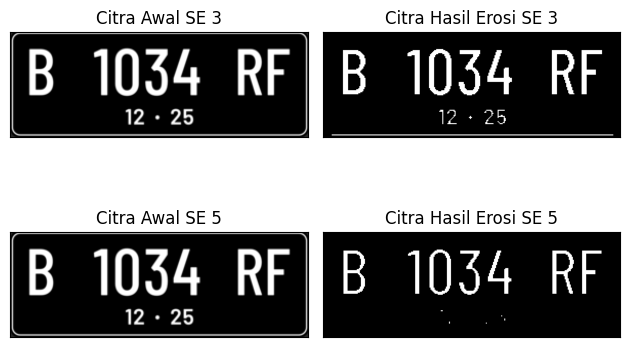

In [51]:
# Fungsi untuk erosi citra dengan SE berbentuk garis vertikal
def erosi_citra(F, k):
    # Ukuran gambar
    m, n = F.shape
    # Generate structure element erosi (SE)
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (1, k))  # SE garis vertikal
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Membaca citra dan melakukan thresholding
img_e = cv2.imread('/content/drive/MyDrive/pcvk/biner-plat.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 255, cv2.THRESH_BINARY)

# Erosi dengan SE Line Vertikal 3
k1 = 3
imgE_3 = erosi_citra(thresh1, k1)
plt.subplot(2, 2, 1), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal SE 3'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(imgE_3, cmap='gray')
plt.title('Citra Hasil Erosi SE 3'), plt.xticks([]), plt.yticks([])

# Erosi dengan SE Line Vertikal 5
k2 = 5
imgE_5 = erosi_citra(thresh1, k2)
plt.subplot(2, 2, 3), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal SE 5'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(imgE_5, cmap='gray')
plt.title('Citra Hasil Erosi SE 5'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

 TopHat

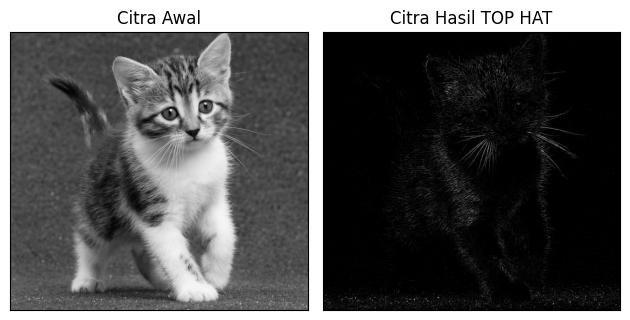

In [53]:
# Mendapatkan kernel yang akan digunakan dalam filter Top-Hat
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/pcvk/kitten01.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menerapkan operasi Top-Hat
tophat_img = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, kernel)

# Menampilkan citra asli dan hasil Top-Hat
plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

 BLACKHAT

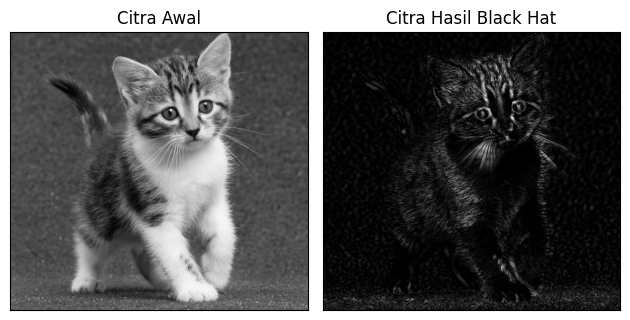

In [55]:
# Mendapatkan kernel yang akan digunakan dalam filter Black-Hat
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/pcvk/kitten01.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Mengubah citra ke grayscale

# Menerapkan operasi Black-Hat
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, Kernel)

# Menampilkan citra asli dan hasil Black-Hat
plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

Skeleton

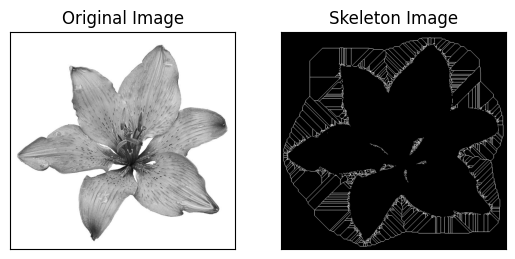

In [58]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# Read the image in grayscale
img = cv.imread('/content/drive/MyDrive/pcvk/lily.jpg', 0)

# Apply triangle thresholding to create a binary image
threshold_value = filters.threshold_triangle(img)
binary = img > threshold_value

# Convert boolean array to binary (0 and 1)
binary_cp = binary.astype(int)

# Skeletonize the binary image
skeleton = skeletonize(binary_cp)

# Print images
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])

# Save the figure
plt.savefig("binary_and_skeleton.png")
plt.show()

Skeleton Inverse

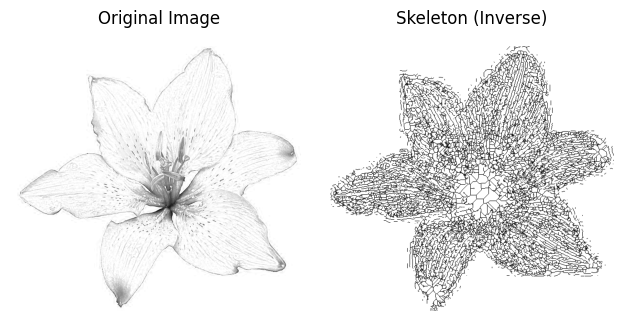

In [61]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# Read the image and convert to grayscale
img = io.imread('/content/drive/MyDrive/pcvk/lily.jpg')[..., 0]

# Create a binary image: black areas (foreground) will be True
binary = img < filters.threshold_triangle(img)

# Skeletonize the binary image
skeleton = skeletonize(binary)

# Print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')  # Hide axes for the original image

# Note the reversed colormap for the skeleton (inverse)
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('Skeleton (Inverse)')
ax[1].axis('off')  # Hide axes for the skeleton image

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Thickening

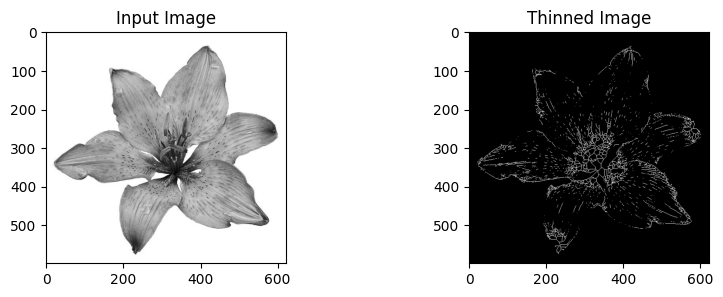

In [63]:
from skimage import img_as_float, io, color, morphology
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/pcvk/lily.jpg')))

# Create a binary image: white areas (foreground) are True
image_binary = image < 0.5

# Skeletonize the binary image
out_skeletonize = morphology.skeletonize(image_binary)

# Thin the binary image (this will actually thin the image)
out_thin = morphology.thin(image_binary)

# Plot the results
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input Image')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thinned Image')

# Save the output image
plt.savefig('/tmp/char_out.png')
plt.show()